In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, concatenate, GlobalMaxPooling1D
import numpy as np

# Load dataset
dataset = pd.read_csv("dataset_phishing.csv")

# Encode categorical labels
label_encoder = LabelEncoder()
dataset['status'] = label_encoder.fit_transform(dataset['status'])

# Text preprocessing
texts = dataset['url'].values  # Assuming 'url' is the text column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_text_length = max([len(seq) for seq in sequences])
vocab_size = len(tokenizer.word_index) + 1

# Padding sequences
X_text = pad_sequences(sequences, maxlen=max_text_length, padding='post')

# Split features and labels
y = dataset['status']

# Splitting data into train and test sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Reshape the input data to add the missing time steps dimension
X_train_text_reshaped = np.expand_dims(X_train_text, axis=-1)
X_test_text_reshaped = np.expand_dims(X_test_text, axis=-1)

# Define CNN model for textual features
input_text = Input(shape=(max_text_length,))
embedding_layer = Embedding(vocab_size, 100)(input_text)  # Adjust embedding dimension as needed
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
cnn_model = Model(inputs=input_text, outputs=pooling_layer)


# Define RNN model for sequential data
input_seq = Input(shape=(max_text_length, 1))
rnn_layer = LSTM(64)(input_seq)
rnn_model = Model(inputs=input_seq, outputs=rnn_layer)

# Combine outputs from CNN and RNN
combined_input = concatenate([cnn_model.output, rnn_model.output])
final_output = Dense(1, activation='sigmoid')(combined_input)

# Define final model
hybrid_model = Model(inputs=[input_text, input_seq], outputs=final_output)

# Compile model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
hybrid_model.fit([X_train_text_reshaped, X_train_text_reshaped], y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate model
loss, accuracy = hybrid_model.evaluate([X_test_text_reshaped, X_test_text_reshaped], y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.7211 - loss: 0.5327 - val_accuracy: 0.9137 - val_loss: 0.2432
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.9611 - loss: 0.1166 - val_accuracy: 0.9213 - val_loss: 0.1865
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 23s 137ms/step - accuracy: 0.9951 - loss: 0.0223 - val_accuracy: 0.9268 - val_loss: 0.1872
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.9999 - loss: 0.0038 - val_accuracy: 0.9290 - val_loss: 0.1921
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9268 - val_loss: 0.1977
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 1.0000 - loss: 7.9729e-04 - val_accuracy: 0.9246 - val_loss: 0.2015
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 1.0000 - loss: 5.2457e-04 - val_accuracy: 0.9257 - val_loss: 0.2044
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 1.0000 -

# CNN and RNN

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, LSTM, Dense, concatenate, GlobalMaxPooling1D
import numpy as np

# Load dataset
dataset = pd.read_csv("dataset_phishing.csv")

# Encode categorical labels
label_encoder = LabelEncoder()
dataset['status'] = label_encoder.fit_transform(dataset['status'])

# Text preprocessing
texts = dataset['url'].values  # Assuming 'url' is the text column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_text_length = max([len(seq) for seq in sequences])
vocab_size = len(tokenizer.word_index) + 1

# Padding sequences
X_text = pad_sequences(sequences, maxlen=max_text_length, padding='post')

# Split features and labels
y = dataset['status']

# Splitting data into train and test sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Reshape the input data to add the missing time steps dimension
X_train_text_reshaped = np.expand_dims(X_train_text, axis=-1)
X_test_text_reshaped = np.expand_dims(X_test_text, axis=-1)

# Define CNN model for textual features
input_text = Input(shape=(max_text_length,))
embedding_layer = Embedding(vocab_size, 100)(input_text)  # Adjust embedding dimension as needed
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
cnn_model = Model(inputs=input_text, outputs=pooling_layer)

# Define RNN model for sequential data
input_seq = Input(shape=(max_text_length, 1))
rnn_layer = LSTM(64)(input_seq)
rnn_model = Model(inputs=input_seq, outputs=rnn_layer)

# Combine outputs from CNN and RNN
combined_input = concatenate([cnn_model.output, rnn_model.output])
final_output = Dense(1, activation='sigmoid')(combined_input)

# Define final model
hybrid_model = Model(inputs=[input_text, input_seq], outputs=final_output)

# Compile model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
hybrid_model.fit([X_train_text_reshaped, X_train_text_reshaped], y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate model
loss, accuracy = hybrid_model.evaluate([X_test_text_reshaped, X_test_text_reshaped], y_test)
print(f'Test Accuracy: {accuracy}')

# Example URL to test
test_url = "http://www.shadetreetechnology.com/V4/validation/ba4b8bddd7958ecb8772c836c2969531"

# Tokenize and pad the test URL
test_sequence = tokenizer.texts_to_sequences([test_url])
test_sequence_padded = pad_sequences(test_sequence, maxlen=max_text_length, padding='post')

# Reshape the input data to add the missing time steps dimension
test_sequence_reshaped = np.expand_dims(test_sequence_padded, axis=-1)

# Make prediction
prediction = hybrid_model.predict([test_sequence_reshaped, test_sequence_reshaped])

# Print prediction
if prediction > 0.5:
    print("The URL is predicted to be phishing.")
else:
    print("The URL is predicted to be legitimate.")


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.7269 - loss: 0.5244 - val_accuracy: 0.9027 - val_loss: 0.2465
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9674 - loss: 0.1166 - val_accuracy: 0.9235 - val_loss: 0.1836
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9951 - loss: 0.0191 - val_accuracy: 0.9279 - val_loss: 0.1869
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.9996 - loss: 0.0037 - val_accuracy: 0.9268 - val_loss: 0.1932
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9257 - val_loss: 0.1985
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 1.0000 - loss: 7.5293e-04 - val_accuracy: 0.9268 - val_loss: 0.2019
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 1.0000 - loss: 5.0637e-04 - val_accuracy: 0.9279 - val_loss: 0.2054
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 1.0000 - 

# CNN

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dense, GlobalMaxPooling1D
import numpy as np

# Load dataset
dataset = pd.read_csv("dataset_phishing.csv")

# Encode categorical labels
label_encoder = LabelEncoder()
dataset['status'] = label_encoder.fit_transform(dataset['status'])

# Text preprocessing
texts = dataset['url'].values  # Assuming 'url' is the text column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_text_length = max([len(seq) for seq in sequences])
vocab_size = len(tokenizer.word_index) + 1

# Padding sequences
X_text = pad_sequences(sequences, maxlen=max_text_length, padding='post')

# Split features and labels
y = dataset['status']

# Splitting data into train and test sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Reshape the input data to add the missing time steps dimension
X_train_text_reshaped = np.expand_dims(X_train_text, axis=-1)
X_test_text_reshaped = np.expand_dims(X_test_text, axis=-1)

# Define CNN model for textual features
input_text = Input(shape=(max_text_length,))
embedding_layer = Embedding(vocab_size, 100)(input_text)  # Adjust embedding dimension as needed
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
output = Dense(1, activation='sigmoid')(pooling_layer)  # Output layer for binary classification

# Define CNN model
cnn_model = Model(inputs=input_text, outputs=output)

# Compile model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
cnn_model.fit(X_train_text_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate model
loss, accuracy = cnn_model.evaluate(X_test_text_reshaped, y_test)
print(f'Test Accuracy: {accuracy}')

# Example URL to test
test_url = "http://www.shadetreetechnology.com/V4/validation/ba4b8bddd7958ecb8772c836c2969531"

# Tokenize and pad the test URL
test_sequence = tokenizer.texts_to_sequences([test_url])
test_sequence_padded = pad_sequences(test_sequence, maxlen=max_text_length, padding='post')

# Make prediction
prediction = cnn_model.predict(test_sequence_padded)

# Print prediction
if prediction > 0.5:
    print("The URL is predicted to be phishing.")
else:
    print("The URL is predicted to be legitimate.")


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.7275 - loss: 0.5209 - val_accuracy: 0.9049 - val_loss: 0.2369
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9600 - loss: 0.1215 - val_accuracy: 0.9246 - val_loss: 0.1863
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.9954 - loss: 0.0216 - val_accuracy: 0.9311 - val_loss: 0.1901
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9999 - loss: 0.0034 - val_accuracy: 0.9279 - val_loss: 0.1890
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9268 - val_loss: 0.1921
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 1.0000 - loss: 7.8465e-04 - val_accuracy: 0.9268 - val_loss: 0.1958
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 1.0000 - loss: 4.8866e-04 - val_accuracy: 0.9246 - val_loss: 0.1982
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 1.0000 - loss: 3.561

# RNN

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
import numpy as np

# Load dataset
dataset = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels
label_encoder = LabelEncoder()
dataset['status'] = label_encoder.fit_transform(dataset['status'])

# Text preprocessing
texts = dataset['url'].values  # Assuming 'url' is the text column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_text_length = max([len(seq) for seq in sequences])
vocab_size = len(tokenizer.word_index) + 1

# Padding sequences
X_text = pad_sequences(sequences, maxlen=max_text_length, padding='post')

# Split features and labels
y = dataset['status']

# Splitting data into train and test sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Reshape the input data to add the missing time steps dimension
X_train_text_reshaped = np.expand_dims(X_train_text, axis=-1)
X_test_text_reshaped = np.expand_dims(X_test_text, axis=-1)

# Define RNN model for textual features
input_text = Input(shape=(max_text_length,))
embedding_layer = Embedding(vocab_size, 100)(input_text)
lstm_layer = LSTM(64)(embedding_layer)
output = Dense(1, activation='sigmoid')(lstm_layer)  # Output layer for binary classification

# Define RNN model
rnn_model = Model(inputs=input_text, outputs=output)

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_text_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_text_reshaped, y_test)
print(f'Test Accuracy: {accuracy}')

# Example URL to test
test_url = "https://rgipt.ac.in/"

# Tokenize and pad the test URL
test_sequence = tokenizer.texts_to_sequences([test_url])
test_sequence_padded = pad_sequences(test_sequence, maxlen=max_text_length, padding='post')

# Make prediction
prediction = rnn_model.predict(test_sequence_padded)

# Print prediction
if prediction > 0.5:
    print("The URL is predicted to be phishing.")
else:
    print("The URL is predicted to be legitimate.")


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.5080 - loss: 0.6941 - val_accuracy: 0.5268 - val_loss: 0.6923
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.4944 - loss: 0.6934 - val_accuracy: 0.4732 - val_loss: 0.6933
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.5039 - loss: 0.6933 - val_accuracy: 0.4732 - val_loss: 0.6934
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.4732 - val_loss: 0.6938
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.5074 - loss: 0.6932 - val_accuracy: 0.4732 - val_loss: 0.6934
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.4925 - loss: 0.6932 - val_accuracy: 0.4732 - val_loss: 0.6940
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.5090 - loss: 0.6931 - val_accuracy: 0.4732 - val_loss: 0.6932
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.5014 - loss: 0.6931 - 

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7557 - loss: 0.5247 - val_accuracy: 0.9148 - val_loss: 0.2333
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9598 - loss: 0.1076 - val_accuracy: 0.9279 - val_loss: 0.1863
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9962 - loss: 0.0235 - val_accuracy: 0.9290 - val_loss: 0.1790
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9333 - val_loss: 0.1868
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9333 - val_loss: 0.1923
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 7.2782e-04 - val_accuracy: 0.9311 - val_loss: 0.1946
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 4.9278e-04 - val_accuracy: 0.9290 - val_loss: 0.1978
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 3.7420e-0

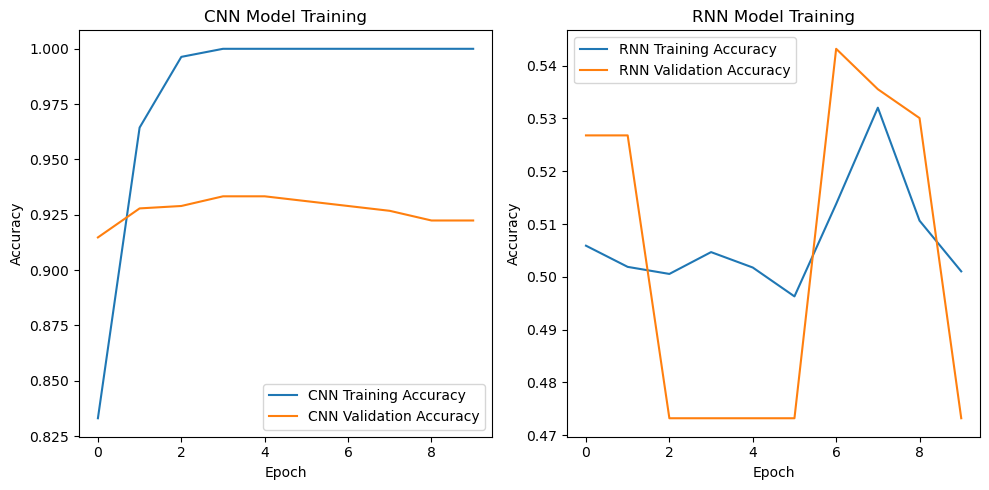

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dense, GlobalMaxPooling1D, LSTM
import matplotlib.pyplot as plt

# Load dataset for CNN
dataset_cnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for CNN
label_encoder_cnn = LabelEncoder()
dataset_cnn['status'] = label_encoder_cnn.fit_transform(dataset_cnn['status'])

# Text preprocessing for CNN
texts_cnn = dataset_cnn['url'].values
tokenizer_cnn = Tokenizer()
tokenizer_cnn.fit_on_texts(texts_cnn)
sequences_cnn = tokenizer_cnn.texts_to_sequences(texts_cnn)
max_text_length_cnn = max([len(seq) for seq in sequences_cnn])
vocab_size_cnn = len(tokenizer_cnn.word_index) + 1

X_text_cnn = pad_sequences(sequences_cnn, maxlen=max_text_length_cnn, padding='post')
y_cnn = dataset_cnn['status']

X_train_text_cnn, X_test_text_cnn, y_train_cnn, y_test_cnn = train_test_split(X_text_cnn, y_cnn, test_size=0.2, random_state=42)
X_train_text_reshaped_cnn = X_train_text_cnn[..., np.newaxis]
X_test_text_reshaped_cnn = X_test_text_cnn[..., np.newaxis]

# Define CNN model
input_text_cnn = Input(shape=(max_text_length_cnn,))
embedding_layer_cnn = Embedding(vocab_size_cnn, 100)(input_text_cnn)
conv_layer_cnn = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer_cnn)
pooling_layer_cnn = GlobalMaxPooling1D()(conv_layer_cnn)
output_cnn = Dense(1, activation='sigmoid')(pooling_layer_cnn)

cnn_model = Model(inputs=input_text_cnn, outputs=output_cnn)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
history_cnn = cnn_model.fit(X_train_text_reshaped_cnn, y_train_cnn, epochs=10, batch_size=64, validation_split=0.1)

# Load dataset for RNN
dataset_rnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for RNN
label_encoder_rnn = LabelEncoder()
dataset_rnn['status'] = label_encoder_rnn.fit_transform(dataset_rnn['status'])

# Text preprocessing for RNN
texts_rnn = dataset_rnn['url'].values
tokenizer_rnn = Tokenizer()
tokenizer_rnn.fit_on_texts(texts_rnn)
sequences_rnn = tokenizer_rnn.texts_to_sequences(texts_rnn)
max_text_length_rnn = max([len(seq) for seq in sequences_rnn])
vocab_size_rnn = len(tokenizer_rnn.word_index) + 1

X_text_rnn = pad_sequences(sequences_rnn, maxlen=max_text_length_rnn, padding='post')
y_rnn = dataset_rnn['status']

X_train_text_rnn, X_test_text_rnn, y_train_rnn, y_test_rnn = train_test_split(X_text_rnn, y_rnn, test_size=0.2, random_state=42)
X_train_text_reshaped_rnn = X_train_text_rnn[..., np.newaxis]
X_test_text_reshaped_rnn = X_test_text_rnn[..., np.newaxis]

# Define RNN model
input_text_rnn = Input(shape=(max_text_length_rnn,))
embedding_layer_rnn = Embedding(vocab_size_rnn, 100)(input_text_rnn)
lstm_layer_rnn = LSTM(64)(embedding_layer_rnn)
output_rnn = Dense(1, activation='sigmoid')(lstm_layer_rnn)

rnn_model = Model(inputs=input_text_rnn, outputs=output_rnn)
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train RNN model
history_rnn = rnn_model.fit(X_train_text_reshaped_rnn, y_train_rnn, epochs=10, batch_size=64, validation_split=0.1)

# Plotting CNN training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Model Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting RNN training history
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
##dpe
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dense, GlobalMaxPooling1D, LSTM
import numpy as np

# Load dataset for CNN
dataset_cnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for CNN
label_encoder_cnn = LabelEncoder()
dataset_cnn['status'] = label_encoder_cnn.fit_transform(dataset_cnn['status'])

# Text preprocessing for CNN
texts_cnn = dataset_cnn['url'].values
tokenizer_cnn = Tokenizer()
tokenizer_cnn.fit_on_texts(texts_cnn)
sequences_cnn = tokenizer_cnn.texts_to_sequences(texts_cnn)
max_text_length_cnn = max([len(seq) for seq in sequences_cnn])
vocab_size_cnn = len(tokenizer_cnn.word_index) + 1

X_text_cnn = pad_sequences(sequences_cnn, maxlen=max_text_length_cnn, padding='post')
y_cnn = dataset_cnn['status']

X_train_text_cnn, X_test_text_cnn, y_train_cnn, y_test_cnn = train_test_split(X_text_cnn, y_cnn, test_size=0.2, random_state=42)
X_train_text_reshaped_cnn = X_train_text_cnn[..., np.newaxis]
X_test_text_reshaped_cnn = X_test_text_cnn[..., np.newaxis]

# Define CNN model
input_text_cnn = Input(shape=(max_text_length_cnn,))
embedding_layer_cnn = Embedding(vocab_size_cnn, 100)(input_text_cnn)
conv_layer_cnn = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer_cnn)
pooling_layer_cnn = GlobalMaxPooling1D()(conv_layer_cnn)
output_cnn = Dense(1, activation='sigmoid')(pooling_layer_cnn)

cnn_model = Model(inputs=input_text_cnn, outputs=output_cnn)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_text_reshaped_cnn, y_train_cnn, epochs=10, batch_size=64, validation_split=0.1)

# Generate classification report for CNN
y_pred_cnn = cnn_model.predict_classes(X_test_text_reshaped_cnn)
print("Classification Report for CNN:")
print(classification_report(y_test_cnn, y_pred_cnn))

# Load dataset for RNN
dataset_rnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for RNN
label_encoder_rnn = LabelEncoder()
dataset_rnn['status'] = label_encoder_rnn.fit_transform(dataset_rnn['status'])

# Text preprocessing for RNN
texts_rnn = dataset_rnn['url'].values
tokenizer_rnn = Tokenizer()
tokenizer_rnn.fit_on_texts(texts_rnn)
sequences_rnn = tokenizer_rnn.texts_to_sequences(texts_rnn)
max_text_length_rnn = max([len(seq) for seq in sequences_rnn])
vocab_size_rnn = len(tokenizer_rnn.word_index) + 1

X_text_rnn = pad_sequences(sequences_rnn, maxlen=max_text_length_rnn, padding='post')
y_rnn = dataset_rnn['status']

X_train_text_rnn, X_test_text_rnn, y_train_rnn, y_test_rnn = train_test_split(X_text_rnn, y_rnn, test_size=0.2, random_state=42)
X_train_text_reshaped_rnn = X_train_text_rnn[..., np.newaxis]
X_test_text_reshaped_rnn = X_test_text_rnn[..., np.newaxis]

# Define RNN model
input_text_rnn = Input(shape=(max_text_length_rnn,))
embedding_layer_rnn = Embedding(vocab_size_rnn, 100)(input_text_rnn)
lstm_layer_rnn = LSTM(64)(embedding_layer_rnn)
output_rnn = Dense(1, activation='sigmoid')(lstm_layer_rnn)

rnn_model = Model(inputs=input_text_rnn, outputs=output_rnn)
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train RNN model
rnn_model.fit(X_train_text_reshaped_rnn, y_train_rnn, epochs=10, batch_size=64, validation_split=0.1)

# Generate classification report for RNN
y_pred_rnn = rnn_model.predict_classes(X_test_text_reshaped_rnn)
print("Classification Report for RNN:")
print(classification_report(y_test_rnn, y_pred_rnn))


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7509 - loss: 0.5241 - val_accuracy: 0.9005 - val_loss: 0.2296
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9659 - loss: 0.1171 - val_accuracy: 0.9344 - val_loss: 0.1925
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9951 - loss: 0.0223 - val_accuracy: 0.9279 - val_loss: 0.1807
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9998 - loss: 0.0035 - val_accuracy: 0.9246 - val_loss: 0.1979
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9213 - val_loss: 0.1988
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 7.7514e-04 - val_accuracy: 0.9202 - val_loss: 0.2032
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 4.8847e-04 - val_accuracy: 0.9191 - val_loss: 0.2076
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 3.6877e-0

AttributeError: 'Functional' object has no attribute 'predict_classes'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dense, GlobalMaxPooling1D, LSTM
import numpy as np

# Load dataset for CNN
dataset_cnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for CNN
label_encoder_cnn = LabelEncoder()
dataset_cnn['status'] = label_encoder_cnn.fit_transform(dataset_cnn['status'])

# Text preprocessing for CNN
texts_cnn = dataset_cnn['url'].values
tokenizer_cnn = Tokenizer()
tokenizer_cnn.fit_on_texts(texts_cnn)
sequences_cnn = tokenizer_cnn.texts_to_sequences(texts_cnn)
max_text_length_cnn = max([len(seq) for seq in sequences_cnn])
vocab_size_cnn = len(tokenizer_cnn.word_index) + 1

X_text_cnn = pad_sequences(sequences_cnn, maxlen=max_text_length_cnn, padding='post')
y_cnn = dataset_cnn['status']

X_train_text_cnn, X_test_text_cnn, y_train_cnn, y_test_cnn = train_test_split(X_text_cnn, y_cnn, test_size=0.2, random_state=42)
X_train_text_reshaped_cnn = X_train_text_cnn[..., np.newaxis]
X_test_text_reshaped_cnn = X_test_text_cnn[..., np.newaxis]

# Define CNN model
input_text_cnn = Input(shape=(max_text_length_cnn,))
embedding_layer_cnn = Embedding(vocab_size_cnn, 100)(input_text_cnn)
conv_layer_cnn = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer_cnn)
pooling_layer_cnn = GlobalMaxPooling1D()(conv_layer_cnn)
output_cnn = Dense(1, activation='sigmoid')(pooling_layer_cnn)

cnn_model = Model(inputs=input_text_cnn, outputs=output_cnn)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_text_reshaped_cnn, y_train_cnn, epochs=10, batch_size=64, validation_split=0.1)

# Generate classification report for CNN
y_pred_prob_cnn = cnn_model.predict(X_test_text_reshaped_cnn)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)
print("Classification Report for CNN:")
print(classification_report(y_test_cnn, y_pred_cnn))

# Load dataset for RNN
dataset_rnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for RNN
label_encoder_rnn = LabelEncoder()
dataset_rnn['status'] = label_encoder_rnn.fit_transform(dataset_rnn['status'])

# Text preprocessing for RNN
texts_rnn = dataset_rnn['url'].values
tokenizer_rnn = Tokenizer()
tokenizer_rnn.fit_on_texts(texts_rnn)
sequences_rnn = tokenizer_rnn.texts_to_sequences(texts_rnn)
max_text_length_rnn = max([len(seq) for seq in sequences_rnn])
vocab_size_rnn = len(tokenizer_rnn.word_index) + 1

X_text_rnn = pad_sequences(sequences_rnn, maxlen=max_text_length_rnn, padding='post')
y_rnn = dataset_rnn['status']

X_train_text_rnn, X_test_text_rnn, y_train_rnn, y_test_rnn = train_test_split(X_text_rnn, y_rnn, test_size=0.2, random_state=42)
X_train_text_reshaped_rnn = X_train_text_rnn[..., np.newaxis]
X_test_text_reshaped_rnn = X_test_text_rnn[..., np.newaxis]

# Define RNN model
input_text_rnn = Input(shape=(max_text_length_rnn,))
embedding_layer_rnn = Embedding(vocab_size_rnn, 100)(input_text_rnn)
lstm_layer_rnn = LSTM(64)(embedding_layer_rnn)
output_rnn = Dense(1, activation='sigmoid')(lstm_layer_rnn)

rnn_model = Model(inputs=input_text_rnn, outputs=output_rnn)
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train RNN model
rnn_model.fit(X_train_text_reshaped_rnn, y_train_rnn, epochs=10, batch_size=64, validation_split=0.1)

# Generate classification report for RNN
y_pred_prob_rnn = rnn_model.predict(X_test_text_reshaped_rnn)
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)
print("Classification Report for RNN:")
print(classification_report(y_test_rnn, y_pred_rnn))


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7447 - loss: 0.5184 - val_accuracy: 0.8984 - val_loss: 0.2441
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9643 - loss: 0.1207 - val_accuracy: 0.9137 - val_loss: 0.2008
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9959 - loss: 0.0220 - val_accuracy: 0.9224 - val_loss: 0.1889
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9998 - loss: 0.0031 - val_accuracy: 0.9279 - val_loss: 0.1871
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9257 - val_loss: 0.1930
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 7.4332e-04 - val_accuracy: 0.9257 - val_loss: 0.1957
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 4.7856e-04 - val_accuracy: 0.9257 - val_loss: 0.1998
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 3.4066e-0

C:\Users\Bindu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bindu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7516 - loss: 0.5208 - val_accuracy: 0.9115 - val_loss: 0.2417
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9655 - loss: 0.1082 - val_accuracy: 0.9246 - val_loss: 0.1995
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9952 - loss: 0.0201 - val_accuracy: 0.9224 - val_loss: 0.1825
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9257 - val_loss: 0.1932
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9257 - val_loss: 0.1983
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 1.0000 - loss: 7.3820e-04 - val_accuracy: 0.9235 - val_loss: 0.1998
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 4.8577e-04 - val_accuracy: 0.9235 - val_loss: 0.2031
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 1.0000 - loss: 3.6290e-0

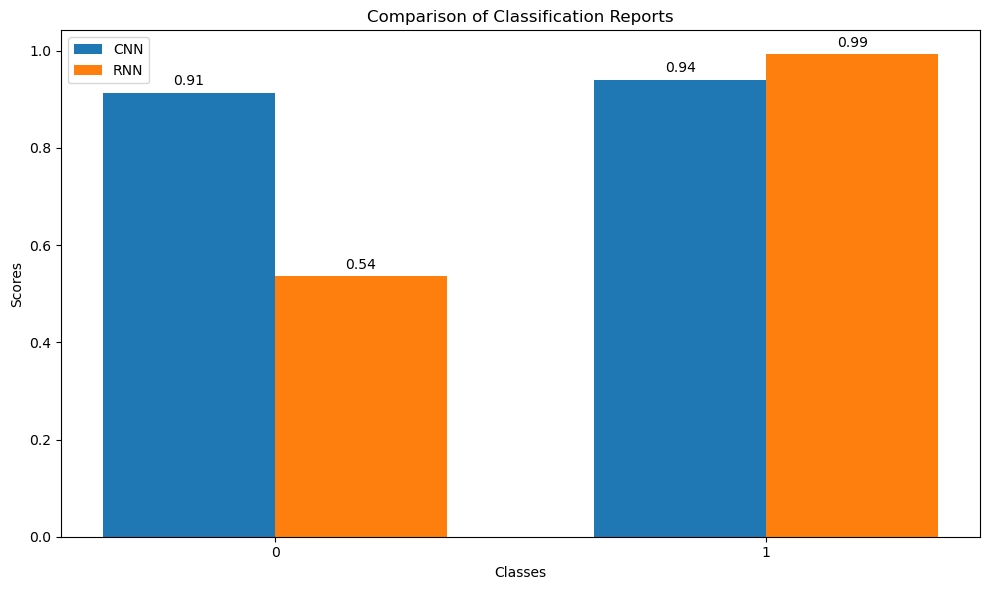

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dense, GlobalMaxPooling1D, LSTM
import numpy as np
import matplotlib.pyplot as plt

# Load dataset for CNN
dataset_cnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for CNN
label_encoder_cnn = LabelEncoder()
dataset_cnn['status'] = label_encoder_cnn.fit_transform(dataset_cnn['status'])

# Text preprocessing for CNN
texts_cnn = dataset_cnn['url'].values
tokenizer_cnn = Tokenizer()
tokenizer_cnn.fit_on_texts(texts_cnn)
sequences_cnn = tokenizer_cnn.texts_to_sequences(texts_cnn)
max_text_length_cnn = max([len(seq) for seq in sequences_cnn])
vocab_size_cnn = len(tokenizer_cnn.word_index) + 1

X_text_cnn = pad_sequences(sequences_cnn, maxlen=max_text_length_cnn, padding='post')
y_cnn = dataset_cnn['status']

X_train_text_cnn, X_test_text_cnn, y_train_cnn, y_test_cnn = train_test_split(X_text_cnn, y_cnn, test_size=0.2, random_state=42)
X_train_text_reshaped_cnn = X_train_text_cnn[..., np.newaxis]
X_test_text_reshaped_cnn = X_test_text_cnn[..., np.newaxis]

# Define CNN model
input_text_cnn = Input(shape=(max_text_length_cnn,))
embedding_layer_cnn = Embedding(vocab_size_cnn, 100)(input_text_cnn)
conv_layer_cnn = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer_cnn)
pooling_layer_cnn = GlobalMaxPooling1D()(conv_layer_cnn)
output_cnn = Dense(1, activation='sigmoid')(pooling_layer_cnn)

cnn_model = Model(inputs=input_text_cnn, outputs=output_cnn)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_text_reshaped_cnn, y_train_cnn, epochs=10, batch_size=64, validation_split=0.1)

# Generate classification report for CNN
y_pred_prob_cnn = cnn_model.predict(X_test_text_reshaped_cnn)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)
class_report_cnn = classification_report(y_test_cnn, y_pred_cnn, output_dict=True)

# Load dataset for RNN
dataset_rnn = pd.read_csv("phishing_dataset.csv")

# Encode categorical labels for RNN
label_encoder_rnn = LabelEncoder()
dataset_rnn['status'] = label_encoder_rnn.fit_transform(dataset_rnn['status'])

# Text preprocessing for RNN
texts_rnn = dataset_rnn['url'].values
tokenizer_rnn = Tokenizer()
tokenizer_rnn.fit_on_texts(texts_rnn)
sequences_rnn = tokenizer_rnn.texts_to_sequences(texts_rnn)
max_text_length_rnn = max([len(seq) for seq in sequences_rnn])
vocab_size_rnn = len(tokenizer_rnn.word_index) + 1

X_text_rnn = pad_sequences(sequences_rnn, maxlen=max_text_length_rnn, padding='post')
y_rnn = dataset_rnn['status']

X_train_text_rnn, X_test_text_rnn, y_train_rnn, y_test_rnn = train_test_split(X_text_rnn, y_rnn, test_size=0.2, random_state=42)
X_train_text_reshaped_rnn = X_train_text_rnn[..., np.newaxis]
X_test_text_reshaped_rnn = X_test_text_rnn[..., np.newaxis]

# Define RNN model
input_text_rnn = Input(shape=(max_text_length_rnn,))
embedding_layer_rnn = Embedding(vocab_size_rnn, 100)(input_text_rnn)
lstm_layer_rnn = LSTM(64)(embedding_layer_rnn)
output_rnn = Dense(1, activation='sigmoid')(lstm_layer_rnn)

rnn_model = Model(inputs=input_text_rnn, outputs=output_rnn)
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train RNN model
rnn_model.fit(X_train_text_reshaped_rnn, y_train_rnn, epochs=10, batch_size=64, validation_split=0.1)

# Generate classification report for RNN
y_pred_prob_rnn = rnn_model.predict(X_test_text_reshaped_rnn)
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)
class_report_rnn = classification_report(y_test_rnn, y_pred_rnn, output_dict=True)

# Extract metrics for plotting
classes = ['0', '1']  # Assuming '0' and '1' are the class labels in your dataset
metrics = ['precision', 'recall', 'f1-score']

cnn_metrics = np.array([[class_report_cnn[label][metric] for metric in metrics] for label in classes])
rnn_metrics = np.array([[class_report_rnn[label][metric] for metric in metrics] for label in classes])

# Plotting the comparison graph
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(classes))

bar_cnn = ax.bar(index - bar_width/2, cnn_metrics[:, 0], bar_width, label='CNN')
bar_rnn = ax.bar(index + bar_width/2, rnn_metrics[:, 0], bar_width, label='RNN')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Reports')
ax.set_xticks(index)
ax.set_xticklabels(classes)
ax.legend()

# Function to annotate bar values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar_cnn)
autolabel(bar_rnn)

plt.tight_layout()
plt.show()
